In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

sns.set(style="whitegrid")

In [7]:
df = pd.read_csv("Top 100 Healthiest Food in the World.csv")
df

,Food,Nutrition Value (per 100g),Quantity,Originated From,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score
0,Kale,"High in Vitamins A, C, K","1 cup, chopped",Ancient Greece,49,4.3,3.6,93.4,1770
1,Blueberries,High in Antioxidants,1 cup,North America,84,1.1,3.6,14.4,9621
2,Salmon,Rich in Omega-3 Fatty Acids,3 oz,North Pacific Ocean,208,22.1,0.0,0.0,689
3,Garlic,Contains Allicin,1 clove,Central Asia,4,0.2,0.1,0.9,5708
4,Spinach,High in Iron and Folate,"1 cup, raw",Ancient Persia,23,2.9,2.2,28.1,1515
...,...,...,...,...,...,...,...,...,...
93,Pomelo,High in Vitamin C,"1 cup, sections",Southeast Asia,72,1.4,2.4,115.3,1548
94,Radicchio,"Low in Calories, High in Vitamin K","1 cup, shredded",Italy,9,0.6,0.4,2.6,1016
95,Jicama,Good Source of Vitamin C,"1 cup, sliced",Mexico,46,0.9,6.4,20.2,406
96,Wakame Seaweed,High in Fucoxanthin,"1 cup, raw",Japan,5,0.3,0.4,3.0,2115


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food                        98 non-null     object 
 1   Nutrition Value (per 100g)  98 non-null     object 
 2   Quantity                    98 non-null     object 
 3   Originated From             98 non-null     object 
 4   Calories                    98 non-null     int64  
 5   Protein (g)                 98 non-null     float64
 6   Fiber (g)                   98 non-null     float64
 7   Vitamin C (mg)              98 non-null     float64
 8   Antioxidant Score           98 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.0+ KB


In [9]:
print("Veri Seti Sütunları:", df.columns)
print("Eksik Değerler:", df.isnull().sum())

Veri Seti Sütunları: Index(['Food', 'Nutrition Value (per 100g)', 'Quantity', 'Originated From',
       'Calories', 'Protein (g)', 'Fiber (g)', 'Vitamin C (mg)',
       'Antioxidant Score'],
      dtype='object')
Eksik Değerler: Food                          0
Nutrition Value (per 100g)    0
Quantity                      0
Originated From               0
Calories                      0
Protein (g)                   0
Fiber (g)                     0
Vitamin C (mg)                0
Antioxidant Score             0
dtype: int64


In [36]:
df_calori = df.copy()
df_calori.drop("Originated From", axis=1, inplace=True)
df_calori.drop("Food", axis=1, inplace=True)
df_calori.drop("Quantity", axis=1, inplace=True)
df_calori.drop("Nutrition Value (per 100g)", axis=1, inplace=True)
df_calori.head()

,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score
0,49,4.3,3.6,93.4,1770
1,84,1.1,3.6,14.4,9621
2,208,22.1,0.0,0.0,689
3,4,0.2,0.1,0.9,5708
4,23,2.9,2.2,28.1,1515


In [38]:
kalori = df_calori[["Calories"]]
df_calori_ml = df_calori.drop("Calories", axis=1)

In [40]:
X_train_calori, X_test_calori, y_train_calori, y_test_calori = train_test_split(df_calori_ml, kalori, test_size=0.2, random_state=42)

In [44]:
poly_calori = PolynomialFeatures(degree=2)
X_poly = poly_calori.fit_transform(X_train_calori)

poly_model_calori = LinearRegression()
poly_model_calori.fit(X_poly, y_train_calori)

X_test_poly = poly_calori.transform(X_test_calori)
y_poly_pred = poly_model_calori.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_calori, y_poly_pred)
r2_poly = r2_score(y_test_calori, y_poly_pred)

print("Polinomsal Regresyon - MSE:", mse_poly)
print("Polinomsal Regresyon - R2:", r2_poly)

Polinomsal Regresyon - MSE: 1852.729179324073
Polinomsal Regresyon - R2: 0.594788303499574


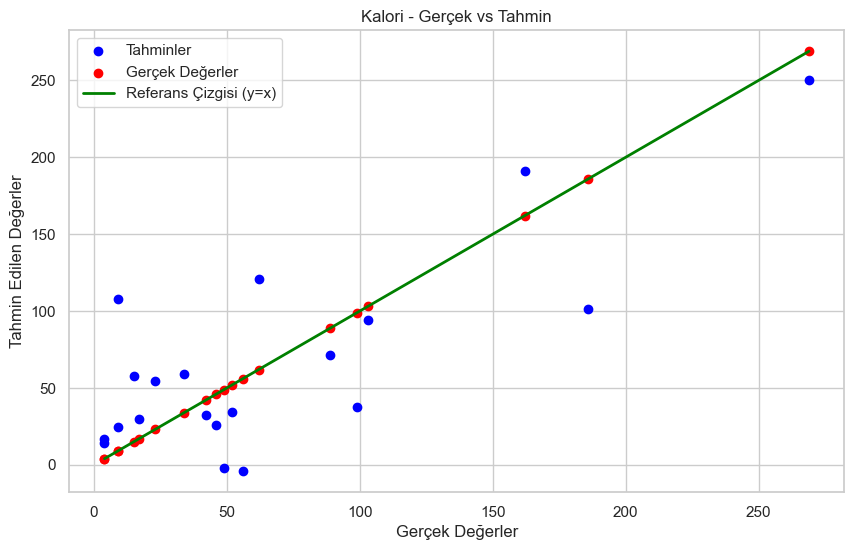

In [52]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test_calori, y_poly_pred, color='blue', label='Tahminler')

plt.scatter(y_test_calori, y_test_calori, color='red', label='Gerçek Değerler')

plt.plot([min(y_test_calori["Calories"]), max(y_test_calori["Calories"])], [min(y_test_calori["Calories"]), max(y_test_calori["Calories"])], color='green', lw=2, label='Referans Çizgisi (y=x)')

plt.title('Kalori - Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.legend()

plt.show()